In [1]:
import tensorflow as tf
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = [9, 6]

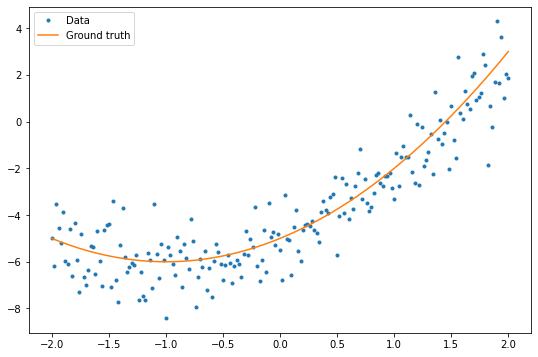

In [2]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)


def f(x):
    y = x ** 2 + 2 * x - 5
    return y


y = f(x) + tf.random.normal(shape=[201])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x), label='Ground truth')
plt.legend()

In [3]:
class Model(tf.keras.Model):
    def __init__(self, units):
        super().__init__()
        self.dense1 = tf.keras.layers.Dense(units=units,
                                            activation=tf.nn.relu,
                                            kernel_initializer=tf.random.normal,
                                            bias_initializer=tf.random.normal)
        self.dense2 = tf.keras.layers.Dense(1)

    def call(self, x, training=True):
        # For Keras layers/models, implement `call` instead of `__call__`.
        x = x[:, tf.newaxis]
        x = self.dense1(x)
        x = self.dense2(x)
        return tf.squeeze(x, axis=1)

In [4]:
model = Model(64)

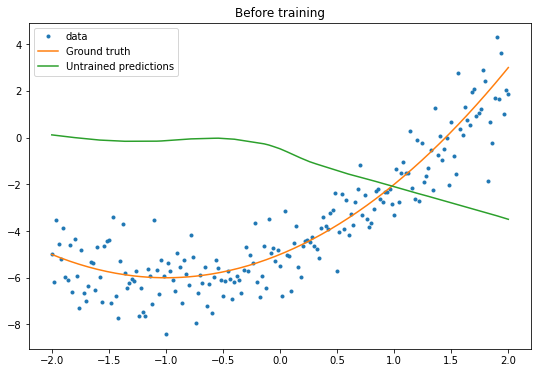

In [5]:
plt.plot(x.numpy(), y.numpy(), '.', label='data')
plt.plot(x, f(x), label='Ground truth')
plt.plot(x, model(x), label='Untrained predictions')
plt.title('Before training')
plt.legend();

In [6]:
variables = model.variables

optimizer = tf.optimizers.SGD(learning_rate=0.01)

for step in range(1000):
    with tf.GradientTape() as tape:
        prediction = model(x)
        error = (y - prediction) ** 2
        mean_error = tf.reduce_mean(error)
    gradient = tape.gradient(mean_error, variables)
    optimizer.apply_gradients(zip(gradient, variables))

    if step % 100 == 0:
        print(f'Mean squared error: {mean_error.numpy():0.3f}')

Mean squared error: 21.861
Mean squared error: 1.042
Mean squared error: 1.029
Mean squared error: 1.021
Mean squared error: 1.016
Mean squared error: 1.012
Mean squared error: 1.009
Mean squared error: 1.007
Mean squared error: 1.005
Mean squared error: 1.004
